In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install html2text

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
import os
import codecs
import pandas as pd
import html2text
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud
import seaborn
from nltk import word_tokenize, pos_tag
import ast
from operator import itemgetter
from gensim.models import LdaModel
from gensim.models.nmf import Nmf
from gensim.models.coherencemodel import CoherenceModel
from sklearn.decomposition import NMF


In [4]:
jokes_dataframe = pd.DataFrame()

In [5]:
def load_clean_joke():

    ret_jokes = []

    for i in range(1,101):
        file = 'init'+str(i)+'.html'
        data = codecs.open('/content/drive/MyDrive/jester_dataset_1_joke_texts/jokes/' + file, 'r', encoding="cp1252")
        joke_html = data.read()

        # Extracting joke
        joke = html2text.html2text(joke_html)
        # Extracting joke_id
        joke_id = int(file.split('init')[1].split('.html')[0])
        cleaned_string = re.sub(r'[\|]+|[-]+', '', joke)

        ret_jokes.append(cleaned_string.strip())

    return ret_jokes


In [6]:
Jokes = load_clean_joke()

In [7]:
jokes_dataframe["Original Jokes"] = Jokes

In [8]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def remove_tags_puntuatuions_tags(Joke):
    special_char_patterns = r'[^a-zA-Z0-9\s]'
    urlPatterns = r'http\S+|www\S+'

    text = Joke

    text = re.sub(special_char_patterns, ' ', text)
    text = re.sub(urlPatterns, ' ', text)
    text = re.sub(r'\n', ' ', text)

    return text

def remove_stop_words_Tokenization(Joke):

    stopwords_ = set(stopwords.words('english'))
    Tokenize_Joke = []
    for word in Joke.split():
        if word not in stopwords_:
            Tokenize_Joke.append(word)

    return Tokenize_Joke

def lower(Joke):
    ret_lst = [word.lower() for word in Joke]
    return ret_lst

def preprocess_clean_jokes(uncleaned_Jokes):

    Cleaned_Jokes = []

    for Joke in uncleaned_Jokes:
        # Remove puntuations and tags from the data
        Joke = remove_tags_puntuatuions_tags(Joke)
        # Correct Spelling
        Joke = TextBlob(Joke)
        # Remove Stop Words and do Tokenization of Joke
        Joke = remove_stop_words_Tokenization(Joke)

        Cleaned_Jokes.append(lower(Joke))

    return Cleaned_Jokes



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
preprocessed_jokes = preprocess_clean_jokes(Jokes)

In [10]:
jokes_dataframe["PreProcessed Jokes"] = preprocessed_jokes

In [11]:
from nltk.stem import PorterStemmer

def stem_tokens(tokenized_text):
    stemmer = PorterStemmer()
    stemmed_tokens = []
    for preprocessed_joke in tokenized_text:
        stemmed_tokens.append([stemmer.stem(token) for token in preprocessed_joke])

    return stemmed_tokens

In [12]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()

    lemmatized_text = " ".join([lemmatizer.lemmatize(word) for word in text])

    return lemmatized_text

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [13]:
lemmitized_jokes = [lemmatize_text(text) for text in preprocessed_jokes]

In [14]:
jokes_dataframe["lemmitized_jokes"] = lemmitized_jokes

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

def feature_Extraction_TF_IDF(corpus):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_array = tfidf_matrix.toarray()

    return tfidf_array, tfidf_vectorizer


In [16]:
TF_IDF_lemma, obj = feature_Extraction_TF_IDF(lemmitized_jokes)

In [17]:
jokes_dataframe["TF_IDF_Lemma"] = [i for i in TF_IDF_lemma]

In [18]:
cleaned_list = list(jokes_dataframe["PreProcessed Jokes"])

merged_lst = []

for joke in cleaned_list:
    merged_lst.append(" ".join(joke))



In [19]:
jokes_dataframe["merged cleaned"] = merged_lst

In [20]:
jokes_dataframe

,Original Jokes,PreProcessed Jokes,lemmitized_jokes,TF_IDF_Lemma,merged cleaned
0,"A man visits the doctor. The doctor says ""I ha...","[a, man, visits, doctor, the, doctor, says, i,...",a man visit doctor the doctor say i bad news y...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a man visits doctor the doctor says i bad news...
1,This couple had an excellent relationship goin...,"[this, couple, excellent, relationship, going,...",this couple excellent relationship going one d...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",this couple excellent relationship going one d...
2,Q. What's 200 feet long and has 4 teeth?\n\nA....,"[q, what, 200, feet, long, 4, teeth, a, the, f...",q what 200 foot long 4 teeth a the front row w...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",q what 200 feet long 4 teeth a the front row w...
3,Q. What's the difference between a man and a t...,"[q, what, difference, man, toilet, a, a, toile...",q what difference man toilet a a toilet follow...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",q what difference man toilet a a toilet follow...
4,Q. What's O. J. Simpson's Internet address?\n\...,"[q, what, o, j, simpson, internet, address, a,...",q what o j simpson internet address a slash sl...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",q what o j simpson internet address a slash sl...
...,...,...,...,...,...
95,Two attorneys went into a diner and ordered tw...,"[two, attorneys, went, diner, ordered, two, dr...",two attorney went diner ordered two drink then...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",two attorneys went diner ordered two drinks th...
96,A teacher is explaining to her class how diffe...,"[a, teacher, explaining, class, different, lan...",a teacher explaining class different language ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a teacher explaining class different languages...
97,Age and Womanhood\n\n1\. Between the ages of 1...,"[age, womanhood, 1, between, ages, 13, 18, she...",age womanhood 1 between age 13 18 she like afr...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10500478...",age womanhood 1 between ages 13 18 she like af...
98,A bus station is where a bus stops. \nA train...,"[a, bus, station, bus, stops, a, train, statio...",a bus station bus stop a train station train s...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a bus station bus stops a train station train ...


In [21]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

def posTagging(text):
    return nltk.pos_tag(text, tagset='universal')

jokes_dataframe['pos_tags'] = jokes_dataframe['PreProcessed Jokes'].apply(lambda x: posTagging(x))
jokes_dataframe.head(2)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


,Original Jokes,PreProcessed Jokes,lemmitized_jokes,TF_IDF_Lemma,merged cleaned,pos_tags
0,"A man visits the doctor. The doctor says ""I ha...","[a, man, visits, doctor, the, doctor, says, i,...",a man visit doctor the doctor say i bad news y...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a man visits doctor the doctor says i bad news...,"[(a, DET), (man, NOUN), (visits, VERB), (docto..."
1,This couple had an excellent relationship goin...,"[this, couple, excellent, relationship, going,...",this couple excellent relationship going one d...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",this couple excellent relationship going one d...,"[(this, DET), (couple, ADJ), (excellent, NOUN)..."


In [22]:
pd.options.mode.chained_assignment = None

In [23]:
jokes_dataframe["pos_tags"][0]

[('a', 'DET'),
 ('man', 'NOUN'),
 ('visits', 'VERB'),
 ('doctor', 'VERB'),
 ('the', 'DET'),
 ('doctor', 'NOUN'),
 ('says', 'VERB'),
 ('i', 'NOUN'),
 ('bad', 'ADJ'),
 ('news', 'NOUN'),
 ('you', 'PRON'),
 ('cancer', 'NOUN'),
 ('alzheimer', 'VERB'),
 ('disease', 'ADP'),
 ('the', 'DET'),
 ('man', 'NOUN'),
 ('replies', 'VERB'),
 ('well', 'ADV'),
 ('thank', 'ADJ'),
 ('god', 'NOUN'),
 ('i', 'NOUN'),
 ('cancer', 'NOUN')]

In [24]:
jokes_dataframe['ADJ'] = pd.Series(dtype=str)
jokes_dataframe['ADP'] = pd.Series(dtype=str)
jokes_dataframe['ADV'] = pd.Series(dtype=str)
jokes_dataframe['CONJ'] = pd.Series(dtype=str)
jokes_dataframe['DET'] = pd.Series(dtype=str)
jokes_dataframe['NOUN'] = pd.Series(dtype=str)
jokes_dataframe['NUM'] = pd.Series(dtype=str)
jokes_dataframe['PRT'] = pd.Series(dtype=str)
jokes_dataframe['PRON'] = pd.Series(dtype=str)
jokes_dataframe['PRT'] = pd.Series(dtype=str)
jokes_dataframe['PRON'] = pd.Series(dtype=str)
jokes_dataframe['VERB'] = pd.Series(dtype=str)
jokes_dataframe['PUNC'] = pd.Series(dtype=str)
jokes_dataframe['OTHERS'] = pd.Series(dtype=str)

In [25]:
def aggregate_tags(col_tags, tag_columns = {
    'ADJ': 'ADJ',
    'ADP': 'ADP',
    'ADV': 'ADV',
    'CONJ': 'CONJ',
    'DET': 'DET',
    'NOUN': 'NOUN',
    'NUM': 'NUM',
    'PRT': 'PRT',
    'PRON': 'PRON',
    'VERB': 'VERB',
    '.': '.',
    'X': 'X'}):
    aggregated_tags = {col: [] for col in tag_columns.values()}

    ret_frame = pd.DataFrame(columns=aggregated_tags)

    for i,joke_tags in enumerate(col_tags):
        temp_dict = {val:[] for val in aggregated_tags.keys()}
        for tag in joke_tags:
            temp_dict[tag[1]].append(tag[0])

        ret_frame = pd.concat([ret_frame, pd.DataFrame([temp_dict])], ignore_index=True)

    return ret_frame

aggregate_tags_frame = aggregate_tags(jokes_dataframe["pos_tags"])


In [26]:
aggregate_tags_frame

,ADJ,ADP,ADV,CONJ,DET,NOUN,NUM,PRT,PRON,VERB,.,X
0,"[bad, thank]",[disease],[well],[],"[a, the, the]","[man, doctor, i, news, cancer, man, god, i, ca...",[],[],[you],"[visits, doctor, says, alzheimer, replies]",[],[]
1,"[couple, girlfriend, awful, big, old]",[that],"[told, possibly, awfully]",[],[this],"[excellent, relationship, day, home, work, pac...","[one, ten]",[],"[he, what, they, he]","[going, came, find, asked, leaving, heard, cou...",[],[]
2,"[long, nelson]","[teeth, willie]",[],[],"[a, the]","[feet, front, row, concert]","[200, 4]",[],[what],[q],[],[]
3,[],[around],[],[],"[a, a]","[difference, man, toilet, follow, use]",[],[],[what],"[q, toilet]",[],[]
4,[slash],[o],[],[],[a],"[j, simpson, internet, address, slash, backsla...",[],[],[what],[q],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...
95,[shrugged],"[eat, told]","[diner, then, quite]",[],"[the, the]","[attorneys, drinks, sandwiches, briefcases, ow...","[two, two]",[],[you],"[went, ordered, produced, started, became, con...",[],[]
96,"[different, positive, negative, negative, posi...","[in, in]","[differently, together]",[but],[a],"[teacher, class, languages, negatives, languag...","[two, two, one]",[],[she],"[explaining, use, says, followed, followed, ma...",[],[]
97,"[hot, exotic, beautiful, free]","[between, like, between, like, between, like, ...","[fully, breathtakingly, still]",[],[],"[age, ages, africa, virgin, ages, asia, ages, ...","[1, 13, 18, 2, 19, 35, 3, 36, 45, 4, 46, 56, 5...",[],"[she, she, she, she]","[womanhood, unexplored, explored, exhausted, p...",[],[]
98,[],[on],[],[],"[a, a]","[bus, station, bus, train, station, train, sto...",[],[],[],[stops],[],[]


pos tagging: https://212digital.medium.com/an-introduction-to-part-of-speech-tagging-what-it-is-and-how-you-can-use-it-in-natural-language-9723f4696f78

sentiment analysis — By identifying words with positive or negative connotations, POS tagging can be used to calculate the overall sentiment of a piece of text.

topic identification — By looking at which words are most commonly used together, POS tagging can help automatically identify the main topics of a document.

In [27]:
def filterByPOS(tags):
    print("Before eval:", tags)
    tags = tags[1:len(tags)-1]
    print("After slicing:", tags)

    try:
        tags = ast.literal_eval(tags)
    except ValueError as e:
        print("Error during literal_eval:", e)

    print("After eval:", tags)

    txt = []

    for t in tags:
        if t[1] in ['NOUN', 'ADV'] and len(t[0]) > 1:
            txt.append(t[0])

    return ' '.join(txt)

helper = jokes_dataframe['pos_tags'].apply(lambda x: filterByPOS(x))


Before eval: [('a', 'DET'), ('man', 'NOUN'), ('visits', 'VERB'), ('doctor', 'VERB'), ('the', 'DET'), ('doctor', 'NOUN'), ('says', 'VERB'), ('i', 'NOUN'), ('bad', 'ADJ'), ('news', 'NOUN'), ('you', 'PRON'), ('cancer', 'NOUN'), ('alzheimer', 'VERB'), ('disease', 'ADP'), ('the', 'DET'), ('man', 'NOUN'), ('replies', 'VERB'), ('well', 'ADV'), ('thank', 'ADJ'), ('god', 'NOUN'), ('i', 'NOUN'), ('cancer', 'NOUN')]
After slicing: [('man', 'NOUN'), ('visits', 'VERB'), ('doctor', 'VERB'), ('the', 'DET'), ('doctor', 'NOUN'), ('says', 'VERB'), ('i', 'NOUN'), ('bad', 'ADJ'), ('news', 'NOUN'), ('you', 'PRON'), ('cancer', 'NOUN'), ('alzheimer', 'VERB'), ('disease', 'ADP'), ('the', 'DET'), ('man', 'NOUN'), ('replies', 'VERB'), ('well', 'ADV'), ('thank', 'ADJ'), ('god', 'NOUN'), ('i', 'NOUN')]
Error during literal_eval: malformed node or string: [('man', 'NOUN'), ('visits', 'VERB'), ('doctor', 'VERB'), ('the', 'DET'), ('doctor', 'NOUN'), ('says', 'VERB'), ('i', 'NOUN'), ('bad', 'ADJ'), ('news', 'NOUN'), 

Applying topic modelling


In [28]:
from gensim.corpora import Dictionary

docs = [d.split() for d in helper]

dictionary = Dictionary(docs)

corpus = [dictionary.doc2bow(doc) for doc in docs]

In [29]:
print(dictionary)

Dictionary<799 unique tokens: ['cancer', 'doctor', 'god', 'man', 'news']...>


In [30]:
temp = dictionary[0]
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=dictionary.id2token,
    chunksize=2000,
    alpha='auto',
    eta='auto',
    iterations=400,
    num_topics=10,
    passes=20,
    eval_every=None
)

top_topics = model.top_topics(corpus)
top_topics

[([(0.027216842, 'father'),
   (0.018437162, 'daughter'),
   (0.018437162, 'date'),
   (0.018437162, 'minutes'),
   (0.018437162, 'screw'),
   (0.018437155, 'atom'),
   (0.009657456, 'sir'),
   (0.009657456, 'boy'),
   (0.009657456, 'carefully'),
   (0.009657456, 'dammit'),
   (0.009657456, 'twist'),
   (0.009657456, 'go'),
   (0.009657456, 'hair'),
   (0.009657456, 'impress'),
   (0.009657456, 'later'),
   (0.009657456, 'marry'),
   (0.009657456, 'now'),
   (0.009657456, 'get'),
   (0.009657455, 'mess'),
   (0.009657455, 'dress')],
  -2.857425323602552),
 ([(0.052030228, 'room'),
   (0.029159743, 'man'),
   (0.023442117, 'pass'),
   (0.01772449, 'peter'),
   (0.017724488, 'pants'),
   (0.012006859, 'gates'),
   (0.012006857, 'religion'),
   (0.012006857, 'well'),
   (0.012006857, 'st'),
   (0.012006855, 'sandwiches'),
   (0.012006855, 'attorneys'),
   (0.012006854, 'guard'),
   (0.012006854, 'chukcha'),
   (0.012006849, 'lightbulb'),
   (0.0062892013, 'heaven'),
   (0.0062892013, 'roo

This above code extracts the top topics from the trained LDA model using the top_topics method. Each topic is
represented as a list of tuples, where each tuple contains a word and its associated weight in the topic.

In [31]:
cluster = []

for d in helper:
    bow = dictionary.doc2bow(d.split())
    topics = model.get_document_topics(bow, minimum_probability = 0.0)
    cluster.append(topics)

jokes_dataframe['cluster'] = pd.Series(cluster)

In [32]:
print(jokes_dataframe["cluster"][0])

[(0, 0.006427131), (1, 0.0035117257), (2, 0.95523), (3, 0.0053626196), (4, 0.004906911), (5, 0.0055767195), (6, 0.0046836473), (7, 0.0049193613), (8, 0.004474853), (9, 0.004907048)]


In [33]:
sorted_topics = []

for i in range(len(jokes_dataframe)):
    sorted_topics.append(sorted(jokes_dataframe['cluster'][i],key=itemgetter(1),  reverse=True))

jokes_dataframe['sorted_topics'] = pd.Series(sorted_topics)
jokes_dataframe.head()

# jokes_dataframe.to_csv("data/jokes_sorted_topic.csv", index=False)

,Original Jokes,PreProcessed Jokes,lemmitized_jokes,TF_IDF_Lemma,merged cleaned,pos_tags,ADJ,ADP,ADV,CONJ,DET,NOUN,NUM,PRT,PRON,VERB,PUNC,OTHERS,cluster,sorted_topics
0,"A man visits the doctor. The doctor says ""I ha...","[a, man, visits, doctor, the, doctor, says, i,...",a man visit doctor the doctor say i bad news y...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a man visits doctor the doctor says i bad news...,"[(a, DET), (man, NOUN), (visits, VERB), (docto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(0, 0.006427131), (1, 0.0035117257), (2, 0.95...","[(2, 0.95523), (0, 0.006427131), (5, 0.0055767..."
1,This couple had an excellent relationship goin...,"[this, couple, excellent, relationship, going,...",this couple excellent relationship going one d...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",this couple excellent relationship going one d...,"[(this, DET), (couple, ADJ), (excellent, NOUN)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(0, 0.0033000864), (1, 0.0018031369), (2, 0.9...","[(2, 0.97701234), (0, 0.0033000864), (5, 0.002..."
2,Q. What's 200 feet long and has 4 teeth?\n\nA....,"[q, what, 200, feet, long, 4, teeth, a, the, f...",q what 200 foot long 4 teeth a the front row w...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",q what 200 feet long 4 teeth a the front row w...,"[(q, VERB), (what, PRON), (200, NUM), (feet, N...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(0, 0.014017317), (1, 0.0076589338), (2, 0.01...","[(9, 0.896432), (2, 0.01662848), (0, 0.0140173..."
3,Q. What's the difference between a man and a t...,"[q, what, difference, man, toilet, a, a, toile...",q what difference man toilet a a toilet follow...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",q what difference man toilet a a toilet follow...,"[(q, VERB), (what, PRON), (difference, NOUN), ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(0, 0.010822035), (1, 0.005913061), (2, 0.012...","[(4, 0.9200403), (2, 0.012837979), (0, 0.01082..."
4,Q. What's O. J. Simpson's Internet address?\n\...,"[q, what, o, j, simpson, internet, address, a,...",q what o j simpson internet address a slash sl...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",q what o j simpson internet address a slash sl...,"[(q, VERB), (what, PRON), (o, ADP), (j, NOUN),...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(0, 0.0064270115), (1, 0.00351166), (2, 0.007...","[(9, 0.9525135), (2, 0.007624242), (0, 0.00642..."


In [34]:
maximum_probability_topic = []
for i in range(len(jokes_dataframe)):
    maximum_probability_topic.append(jokes_dataframe['sorted_topics'][i][0][0])

jokes_dataframe['main_topic'] = maximum_probability_topic
# jokes1.to_csv("data/jokes_sorted_topic.csv", index=False)

In [35]:
jokes_dataframe

,Original Jokes,PreProcessed Jokes,lemmitized_jokes,TF_IDF_Lemma,merged cleaned,pos_tags,ADJ,ADP,ADV,CONJ,...,NOUN,NUM,PRT,PRON,VERB,PUNC,OTHERS,cluster,sorted_topics,main_topic
0,"A man visits the doctor. The doctor says ""I ha...","[a, man, visits, doctor, the, doctor, says, i,...",a man visit doctor the doctor say i bad news y...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a man visits doctor the doctor says i bad news...,"[(a, DET), (man, NOUN), (visits, VERB), (docto...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(0, 0.006427131), (1, 0.0035117257), (2, 0.95...","[(2, 0.95523), (0, 0.006427131), (5, 0.0055767...",2
1,This couple had an excellent relationship goin...,"[this, couple, excellent, relationship, going,...",this couple excellent relationship going one d...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",this couple excellent relationship going one d...,"[(this, DET), (couple, ADJ), (excellent, NOUN)...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(0, 0.0033000864), (1, 0.0018031369), (2, 0.9...","[(2, 0.97701234), (0, 0.0033000864), (5, 0.002...",2
2,Q. What's 200 feet long and has 4 teeth?\n\nA....,"[q, what, 200, feet, long, 4, teeth, a, the, f...",q what 200 foot long 4 teeth a the front row w...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",q what 200 feet long 4 teeth a the front row w...,"[(q, VERB), (what, PRON), (200, NUM), (feet, N...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(0, 0.014017317), (1, 0.0076589338), (2, 0.01...","[(9, 0.896432), (2, 0.01662848), (0, 0.0140173...",9
3,Q. What's the difference between a man and a t...,"[q, what, difference, man, toilet, a, a, toile...",q what difference man toilet a a toilet follow...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",q what difference man toilet a a toilet follow...,"[(q, VERB), (what, PRON), (difference, NOUN), ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(0, 0.010822035), (1, 0.005913061), (2, 0.012...","[(4, 0.9200403), (2, 0.012837979), (0, 0.01082...",4
4,Q. What's O. J. Simpson's Internet address?\n\...,"[q, what, o, j, simpson, internet, address, a,...",q what o j simpson internet address a slash sl...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",q what o j simpson internet address a slash sl...,"[(q, VERB), (what, PRON), (o, ADP), (j, NOUN),...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(0, 0.0064270115), (1, 0.00351166), (2, 0.007...","[(9, 0.9525135), (2, 0.007624242), (0, 0.00642...",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Two attorneys went into a diner and ordered tw...,"[two, attorneys, went, diner, ordered, two, dr...",two attorney went diner ordered two drink then...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",two attorneys went diner ordered two drinks th...,"[(two, NUM), (attorneys, NOUN), (went, VERB), ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(0, 0.0041693645), (1, 0.0022781026), (2, 0.0...","[(6, 0.9690494), (2, 0.004946038), (0, 0.00416...",6
96,A teacher is explaining to her class how diffe...,"[a, teacher, explaining, class, different, lan...",a teacher explaining class different language ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",a teacher explaining class different languages...,"[(a, DET), (teacher, NOUN), (explaining, VERB)...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(0, 0.0030854926), (1, 0.0016858849), (2, 0.0...","[(8, 0.9769951), (2, 0.0036602616), (0, 0.0030...",8
97,Age and Womanhood\n\n1\. Between the ages of 1...,"[age, womanhood, 1, between, ages, 13, 18, she...",age womanhood 1 between age 13 18 she like afr...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10500478...",age womanhood 1 between ages 13 18 she like af...,"[(age, NOUN), (womanhood, VERB), (1, NUM), (be...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(0, 0.0028972353), (1, 0.0015830228), (2, 0.0...","[(3, 0.978799), (2, 0.0034369354), (0, 0.00289...",3
98,A bus station is where a bus 

In [36]:
top_topics[8]

([(0.0151294675, 'walks'),
  (0.0151294675, 'engineer'),
  (0.0151294675, 'teacher'),
  (0.0151294675, 'measures'),
  (0.010248942, 'bartender'),
  (0.010248941, 'bear'),
  (0.010248941, 'panda'),
  (0.01024894, 'orders'),
  (0.01024894, 'managers'),
  (0.01024894, 'ladders'),
  (0.01024894, 'pulls'),
  (0.010248939, 'beer'),
  (0.010248938, 'washington'),
  (0.010248937, 'nixon'),
  (0.010248936, 'bus'),
  (0.010248936, 'job'),
  (0.010248936, 'train'),
  (0.010248936, 'station'),
  (0.010248934, 'applicant'),
  (0.010248928, 'difference')],
 -18.533778086497268)

Testing NMF

0                   man doctor news cancer man well god
1     excellent relationship day home work packing t...
2                                        feet front row
3                          difference man toilet follow
4     simpson internet address slash backslash slash...
                            ...                        
95    attorneys diner drinks then sandwiches briefca...
96    teacher class languages negatives differently ...
97    ages africa virgin ages asia ages america full...
98    bus station bus train station train stops desk...
99                whats difference president knee greet
Name: pos_tags, Length: 100, dtype: object
0     [a, man, visits, doctor, the, doctor, says, i,...
1     [this, couple, excellent, relationship, going,...
2     [q, what, 200, feet, long, 4, teeth, a, the, f...
3     [q, what, difference, man, toilet, a, a, toile...
4     [q, what, o, j, simpson, internet, address, a,...
                            ...                        
95   

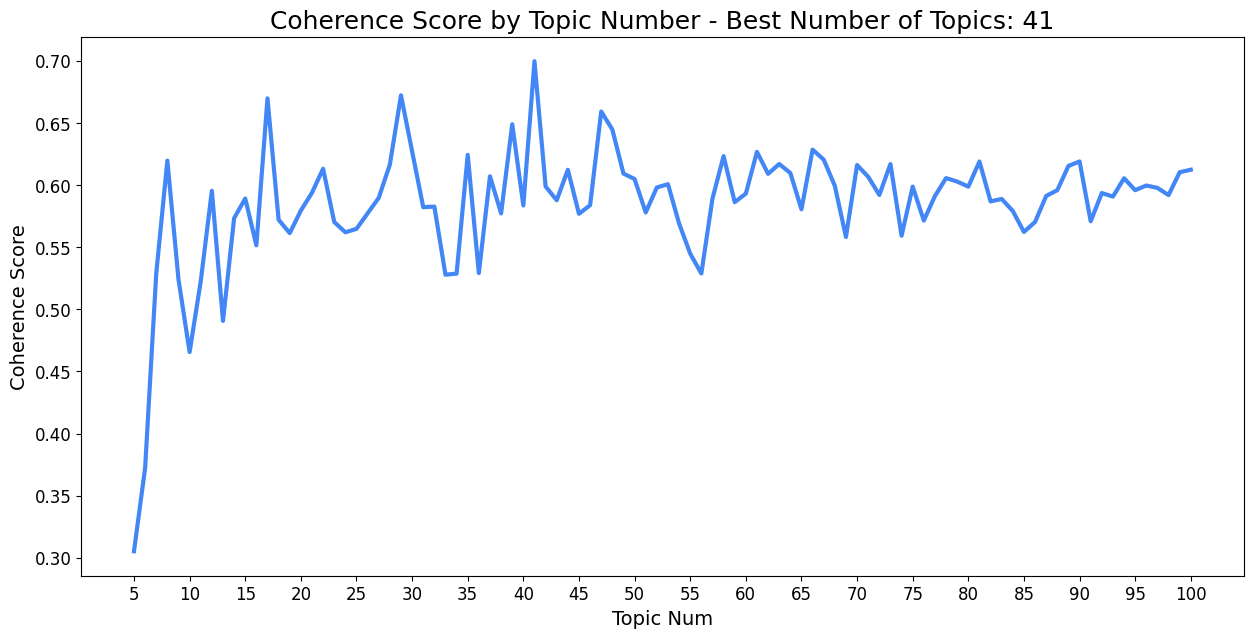

In [37]:
from gensim.corpora import Dictionary
texts = jokes_dataframe["PreProcessed Jokes"]
print(helper)
print(texts)
# all_words = ' '.join(jokes_dataframe['lemmitized_jokes']).split()

# jokes_dataframe['unique_words'] = jokes_dataframe['lemmitized_jokes'].apply(lambda x: list(set(x.split())))
# texts1 = jokes_dataframe['unique_words']
# jokes_dataframe.pop('unique_words')

jokes_dataframe['unique_words'] = helper.apply(lambda x: list(set(x.split())))
texts1 = jokes_dataframe['unique_words']
jokes_dataframe.pop('unique_words')

print(texts1)
# print(texts1)
# texts = helper
print(type(texts))
docs = [d.split() for d in helper]

dictionary = Dictionary(docs)

corpus = [dictionary.doc2bow(doc) for doc in docs]
topic_nums = list(np.arange(5, 100 + 1, 1))

coherence_scores = []

for num in topic_nums:
    print(num)
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )

    cm = CoherenceModel(
        model=nmf,
        texts=texts1,
        dictionary=dictionary,
        coherence='c_v'
    )
    coherence_scores.append(round(cm.get_coherence(), 5))

scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [38]:
from nltk.tokenize import RegexpTokenizer

def top_words(topic, n_top_words):
    return topic.argsort()[:-n_top_words - 1:-1]

def topic_table(model, feature_names, n_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        t = (topic_idx)
        top_words_idx = top_words(topic, n_top_words)
        top_words_prob = topic[top_words_idx]
        top_words_list = [feature_names[i] for i in top_words_idx]
        print(f"Topic {topic_idx}:")
        for word, prob in zip(top_words_list, top_words_prob):
            print(f"{word}: {prob:.4f}")
        print()
        topics[t] = top_words_list
    return pd.DataFrame(topics)


In [44]:
# tfidf = obj.fit_transform(lemmitized_jokes)
tfidf_vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    preprocessor=' '.join
)

tfidf = tfidf_vectorizer.fit_transform(texts1)
tfidf_ft = tfidf_vectorizer.get_feature_names_out()
nmf = NMF(
    n_components=best_num_topics,
    init='nndsvd',
    max_iter=500,
    l1_ratio=0.0,
    solver='cd',
    alpha_W=0.0,
    tol=1e-4,
    random_state=42
).fit(tfidf)

docweights = nmf.transform(tfidf_vectorizer.transform(texts1))
# docweights = nmf.transform(tfidf_vectorizer.transform(texts1))

n_top_words = 6

topic_df = topic_table(
    nmf,
    tfidf_ft,
    n_top_words
).T

# Cleaning up the top words to create topic summaries
topic_df['topics'] = topic_df.apply(lambda x: [' '.join(x)], axis=1) # Joining each word into a list
topic_df['topics'] = topic_df['topics'].apply(lambda x: [' '.join(x)])  # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets

topic_df.head()


Topic 0:
difference: 1.3080
difference government: 0.4176
government: 0.4176
difference etchasketch: 0.2528
sightings: 0.2528
weapons: 0.2528

Topic 1:
light: 1.1960
screw: 1.1907
light screw: 0.5817
screw men: 0.5817
bulb light: 0.4631
feminists: 0.4631

Topic 2:
walks bartender: 1.5319
bartender: 1.5069
walks: 1.3263
bar: 1.2996
so walks: 0.9193
horse: 0.9193

Topic 3:
resources: 1.3276
resources everybody: 1.3261
asia: 1.3261
interest virgin: 1.3261
breathtakingly: 1.3261
breathtakingly america: 1.3261

Topic 4:
person: 0.8786
call person: 0.1952
speaks languages: 0.1952
speaks: 0.1952
language call: 0.1952
languages language: 0.1952

Topic 5:
how: 2.6238
day how: 2.1544
day: 1.9603
change: 1.6140
watch: 1.3361
watch change: 1.3361

Topic 6:
lightbulb: 0.6991
change: 0.6685
hold change: 0.3870
hold: 0.3870
change irishmen: 0.3870
lightbulb hold: 0.3870

Topic 7:
bill: 0.9096
monica: 0.7714
monica bill: 0.7714
kind: 0.3418
pharmacy bill: 0.3418
walks duck: 0.3418

Topic 8:
men: 0.651

,0,1,2,3,4,5,topics
0,difference,difference government,government,difference etchasketch,sightings,weapons,difference difference government government di...
1,light,screw,light screw,screw men,bulb light,feminists,light screw light screw screw men bulb light f...
2,walks bartender,bartender,walks,bar,so walks,horse,walks bartender bartender walks bar so walks h...
3,resources,resources everybody,asia,interest virgin,breathtakingly,breathtakingly america,resources resources everybody asia interest vi...
4,person,call person,speaks languages,speaks,language call,languages language,person call person speaks languages speaks lan...


In [48]:
df_nmf = pd.DataFrame({
    'joke': jokes_dataframe["Original Jokes"],
    'topic_num': docweights.argmax(axis=1)
})
df_nmf
# print((set(df_nmf["topic_num"])))

,joke,topic_num
0,"A man visits the doctor. The doctor says ""I ha...",12
1,This couple had an excellent relationship goin...,26
2,Q. What's 200 feet long and has 4 teeth?\n\nA....,13
3,Q. What's the difference between a man and a t...,0
4,Q. What's O. J. Simpson's Internet address?\n\...,29
...,...,...
95,Two attorneys went into a diner and ordered tw...,39
96,A teacher is explaining to her class how diffe...,22
97,Age and Womanhood\n\n1\. Between the ages of 1...,3
98,A bus station is where a bus stops. \nA train...,36


Preprocess the ratings

In [68]:
ratings_df = pd.read_excel("/content/drive/MyDrive/jester-data-1.xls", header =None)
j = ["joke_" + str(i) for i in range(1,101)]
headings = ["number_of_jokes_rated"]
headings.extend(j)
ratings_df.columns = headings
ratings_df.insert(0, 'user_id', [i for i in range(1,len(ratings_df["joke_1"])+1)])
ratings_df.replace(99.0, np.nan, inplace=True)


ratings_df

,user_id,number_of_jokes_rated,joke_1,joke_2,joke_3,joke_4,joke_5,joke_6,joke_7,joke_8,...,joke_91,joke_92,joke_93,joke_94,joke_95,joke_96,joke_97,joke_98,joke_99,joke_100
0,1.0,74.0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,2.0,100.0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,3.0,49.0,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,48.0,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,91.0,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,24979.0,100.0,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,...,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,24980.0,91.0,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,...,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,24981.0,39.0,NaN,NaN,NaN,NaN,-7.77,NaN,6.70,-6.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24981,24982.0,37.0,NaN,NaN,NaN,NaN,-9.71,NaN,4.56,-8.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
ratings1 = ratings_df.iloc[:, 2:102]
ratings1['mean_rating'] = ratings1.mean(axis=1)
mean = ratings1['mean_rating']
ratings1['std_dev'] = ratings1.std(axis=1)
std_dev = ratings1['std_dev']
for i in range(100):
    ratings1[ratings1.columns[i]] = (ratings1[ratings1.columns[i]] - ratings1['mean_rating'])/ratings1['std_dev']

ratings1


,joke_1,joke_2,joke_3,joke_4,joke_5,joke_6,joke_7,joke_8,joke_9,joke_10,...,joke_93,joke_94,joke_95,joke_96,joke_97,joke_98,joke_99,joke_100,mean_rating,std_dev
0,-0.687276,1.914223,-0.975462,-0.740528,-0.640290,-0.793780,-1.005220,1.190627,-0.868958,-0.208012,...,NaN,NaN,NaN,NaN,-0.344273,NaN,NaN,NaN,-3.431892,6.384781
1,0.274579,-0.625106,0.743980,0.334284,-1.055391,-2.554180,-0.715693,-1.664789,1.262792,1.332790,...,-0.625106,1.052797,-0.604519,-1.005980,0.064584,-0.495403,-1.454794,-0.345113,2.746300,4.857253
2,NaN,NaN,NaN,NaN,0.514482,0.578439,0.514482,0.578439,NaN,NaN,...,NaN,0.527806,NaN,NaN,NaN,NaN,NaN,NaN,7.099388,3.752537
3,NaN,1.153781,NaN,NaN,-0.173948,1.115267,-1.110452,0.719989,NaN,-0.165839,...,NaN,-0.431385,NaN,NaN,NaN,NaN,NaN,NaN,2.658125,4.933237
4,1.209690,0.312917,-1.711163,-1.992413,-0.436315,-0.380987,0.873112,0.312917,-0.851275,0.571114,...,0.234536,0.446626,0.571114,-0.392514,-0.032883,0.760151,-0.334881,-0.380987,3.252637,4.337773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,-0.349336,0.807614,1.080714,-0.036513,0.107485,0.695064,-1.877040,-0.509886,-1.868764,0.774511,...,1.103886,-1.531114,0.976440,1.072438,0.661961,1.016163,1.032715,0.807614,2.550600,6.041746
24979,1.073643,-1.489530,0.993590,1.066231,-0.150869,-1.603680,-0.798704,0.577019,-1.482118,0.446563,...,-0.496282,-0.244264,1.086985,-1.495460,-1.351662,-1.553276,1.073643,0.972836,1.887692,6.745544
24980,NaN,NaN,NaN,NaN,-1.370374,NaN,1.467375,-1.170340,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.782308,5.099112
24981,NaN,NaN,NaN,NaN,-1.856550,NaN,0.972833,-1.576983,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.346486,5.043501


In [70]:
ratings1 = ratings_df.iloc[:, 2:102]
ratings1['quantile1'] = ratings1.quantile(q=0.25, axis=1)
ratings1['quantile3'] = ratings1.quantile(q=0.75, axis=1)

for i in range(100):
    ratings1[ratings1.columns[i]] = (ratings1[ratings1.columns[i]]-ratings1['quantile1'])/(ratings1['quantile3']-ratings1['quantile1'])


ratings1['user_id'] = ratings_df.iloc[:,0]
ratings1['number_of_jokes_rated'] = ratings_df.iloc[:,1]


ratings1

<ipython-input-70-cf155a2e7125>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ratings1['user_id'] = ratings_df.iloc[:,0]
<ipython-input-70-cf155a2e7125>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ratings1['number_of_jokes_rated'] = ratings_df.iloc[:,1]


,joke_1,joke_2,joke_3,joke_4,joke_5,joke_6,joke_7,joke_8,joke_9,joke_10,...,joke_95,joke_96,joke_97,joke_98,joke_99,joke_100,quantile1,quantile3,user_id,number_of_jokes_rated
0,0.074581,1.519243,-0.085453,0.045010,0.100674,0.015438,-0.101979,1.117417,-0.026310,0.340726,...,NaN,NaN,0.265058,NaN,NaN,NaN,-8.6775,2.8200,1.0,74.0
1,0.596992,0.071278,0.871278,0.631880,-0.180150,-1.055940,0.018346,-0.536241,1.174436,1.215338,...,0.083308,-0.151278,0.474286,0.147068,-0.413534,0.234887,-0.8825,7.4300,2.0,100.0
2,NaN,NaN,NaN,NaN,1.000000,1.137143,1.000000,1.137143,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.2800,9.0300,3.0,49.0
3,NaN,1.205093,NaN,NaN,0.315450,1.179287,-0.312054,0.914431,NaN,0.320883,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.5225,6.8400,4.0,48.0
4,1.462513,0.640971,-1.213305,-1.470961,-0.045407,0.005280,1.154171,0.640971,-0.425554,0.877508,...,0.877508,-0.005280,0.324182,1.050686,0.047518,0.005280,1.5750,6.3100,5.0,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,0.227207,0.901592,1.060781,0.409551,0.493488,0.835986,-0.663290,0.133623,-0.658466,0.882296,...,1.000000,1.055958,0.816691,1.023155,1.032803,0.901592,-1.9150,8.4500,24979.0,100.0
24979,1.032446,-0.405990,0.987521,1.028286,0.345258,-0.470050,-0.018303,0.753744,-0.401830,0.680532,...,1.039933,-0.409318,-0.328619,-0.441764,1.032446,0.975874,-3.2800,8.7400,24980.0,91.0
24980,NaN,NaN,NaN,NaN,-0.154876,NaN,1.689611,-0.024857,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-6.5550,1.2900,24981.0,39.0
24981,NaN,NaN,NaN,NaN,-0.659271,NaN,1.149921,-0.480507,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-4.5100,3.3775,24982.0,37.0
